In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import json
import glob
import os
import re

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
base = "../exp/"
paths = glob.glob(base + "rand/*.json") + glob.glob(base + "1h/*.json")
data = [json.load(open(path)) for path in paths]

In [21]:
queries = pd.DataFrame.from_records([{
    **algo,
    'potential': run['potential'],
    'graph': run['args'][1],
    'queryset': run['args'][2],
    'topo': 'no_topo' not in run['program'],
} for run in data for algo in run['algo_runs']])

queries_shifted = queries.copy()
queries_shifted['at'] += 24 * 3600 * 1000
queries = pd.concat([queries, queries_shifted], ignore_index=True)

queries = queries.query('topo')

In [22]:
queries['departure_hour'] = queries['at'] // 3600000

In [23]:
queries_sub = queries.query('potential != "zero"').loc[lambda x: x['graph'].str.contains('osm')]
(queries_sub.query('queryset == "queries/uniform"')['result'] / 3600000).describe()

count   60000.00
mean        4.13
std         1.87
min         0.12
25%         2.72
50%         4.03
75%         5.42
max        15.68
Name: result, dtype: float64

<AxesSubplot:xlabel='departure_hour', ylabel='running_time_ms'>

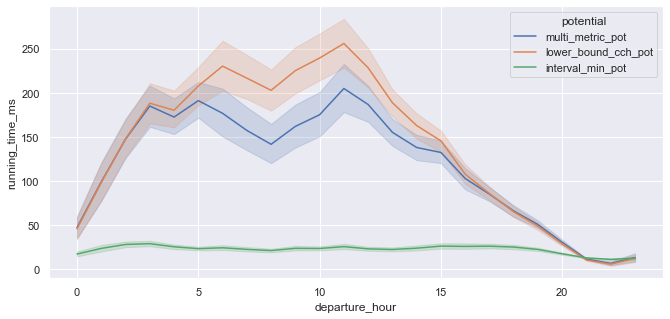

In [6]:
plt.figure(figsize=(11,5))
sns.lineplot(data=queries_sub.query('queryset == "queries/uniform"'), x='departure_hour', y='running_time_ms', hue='potential')

<AxesSubplot:xlabel='departure_hour', ylabel='running_time_ms'>

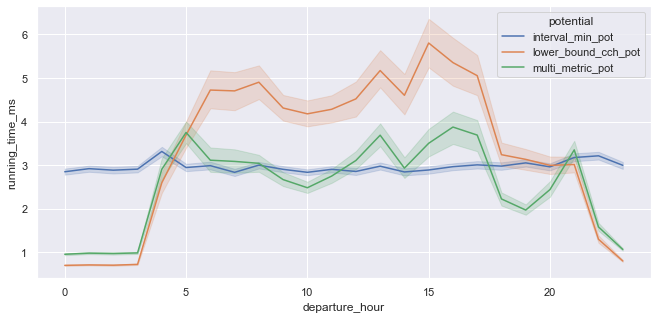

In [7]:
plt.figure(figsize=(11,5))
sns.lineplot(data=queries_sub.query('queryset == "queries/1h"'), x='departure_hour', y='running_time_ms', hue='potential')

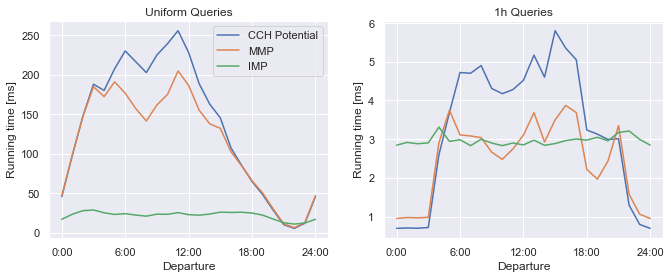

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))
g = sns.lineplot(data=queries_sub.query('queryset == "queries/uniform" & departure_hour <= 24'), x='departure_hour', y='running_time_ms', hue='potential', hue_order=['lower_bound_cch_pot', 'multi_metric_pot', 'interval_min_pot'], ax=axs[0], ci=None)
g.set_title('Uniform Queries')
g.set_xlabel('Departure')
g.set_ylabel('Running time [ms]')
g.xaxis.set_major_locator(mpl.ticker.IndexLocator(6,0))
g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{int(val)}:00"))
g.legend(['CCH Potential', 'MMP', 'IMP'], title=None, loc='upper right')
g = sns.lineplot(data=queries_sub.query('queryset == "queries/1h" & departure_hour <= 24'), x='departure_hour', y='running_time_ms', hue='potential', hue_order=['lower_bound_cch_pot', 'multi_metric_pot', 'interval_min_pot'], ax=axs[1], ci=None, legend=False)
g.set_title('1h Queries')
g.set_xlabel('Departure')
g.set_ylabel('Running time [ms]')
g.xaxis.set_major_locator(mpl.ticker.IndexLocator(6,0))
g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{int(val)}:00"))

In [8]:
queries_sub = queries.query('potential != "zero"').loc[lambda x: x['graph'].str.contains('ptv')]
(queries_sub.query('queryset == "queries/uniform"')['result'] / 3600000).describe()

count   29991.00
mean        7.89
std         4.05
min         0.22
25%         4.90
50%         7.36
75%        10.26
max        27.39
Name: result, dtype: float64

<AxesSubplot:xlabel='departure_hour', ylabel='running_time_ms'>

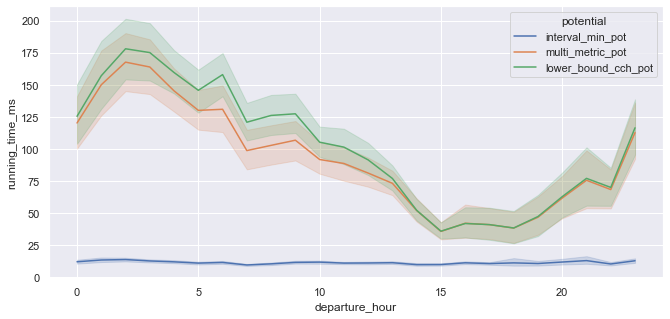

In [9]:
plt.figure(figsize=(11,5))
sns.lineplot(data=queries_sub.query('queryset == "queries/uniform"'), x='departure_hour', y='running_time_ms', hue='potential')

<AxesSubplot:xlabel='departure_hour', ylabel='running_time_ms'>

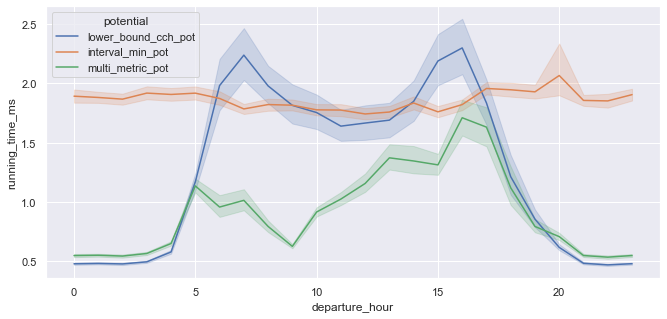

In [10]:
plt.figure(figsize=(11,5))
sns.lineplot(data=queries_sub.query('queryset == "queries/1h"'), x='departure_hour', y='running_time_ms', hue='potential')